In [1]:
from analysis import ANALYSIS_CONFIGS
from analysis.analysis import FinancialAnalysis
from analysis.doc_utils import ReportDocument

In [2]:
ANALYSIS_CONFIGS

['all_analysis.json',
 'asset_quality_analysis.json',
 'asset_indepth_analysis.json',
 'asset_fraud_analysis.json',
 'profit_analysis.json',
 'cash_flow_analysis.json']

In [3]:
analysis = FinancialAnalysis(ANALYSIS_CONFIGS[0])
images, titles, fields = analysis.images, analysis.titles, analysis.fields

### 总资产规模和增长率

In [4]:
t1 = analysis.init_table('t1')
t1['总资产增长率'] = t1['资产合计(元)'].pct_change()

analysis.format_show_table('t1')

,2015,2016,2017,2018,2019,2020
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"
总资产增长率,nan%,15.33%,19.89%,6.26%,11.58%,9.65%


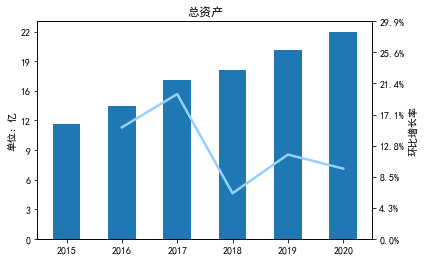

In [5]:
analysis.show_plot('t1')

### 资产负债率

In [6]:
t2 = analysis.init_table('t2')
t2['资产负债率'] = t2['负债合计(元)'] / t2['资产合计(元)']

analysis.format_show_table('t2')

,2015,2016,2017,2018,2019,2020
负债合计(元),"168,415,800","246,575,200","367,271,500","415,501,400","467,556,400","474,821,000"
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"
资产负债率,13.90%,17.64%,21.92%,23.34%,23.53%,21.80%


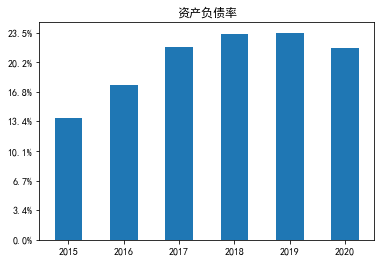

In [7]:
analysis.show_plot('t2')

### 准货币资金与有息负债的差额

In [8]:
t3 = analysis.init_table('t3')
t3['准货币资金'] = t3.T[:4].sum()
t3['有息负债总额'] = t3.T[5:10].sum()
t3['总货币资金与有息负债之差'] = t3['准货币资金'] - t3['有息负债总额']

analysis.format_show_table('t3')

,2015,2016,2017,2018,2019,2020
货币资金(元),"371,817,300","370,078,000","865,129,000","839,378,600","799,127,100","509,970,800"
交易性金融资产(元),0,0,0,0,0,"500,000,000"
其他流动资产里的理财产品,"370,000,000","550,000,000",0,0,0,0
其他流动资产里的结构性存款,0,0,0,0,0,0
准货币资金,"741,817,300","920,078,000","865,129,000","839,378,600","799,127,100","1,009,970,800"
短期借款(元),0,0,0,0,0,0
一年内到期的非流动负债(元),0,0,0,0,0,0
长期借款(元),0,0,0,0,0,0
应付债券(元),0,0,0,0,0,0
长期应付款,0,0,0,0,0,0


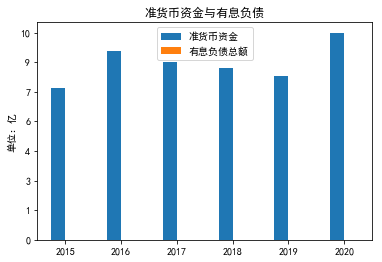

In [9]:
analysis.show_plot('t3')

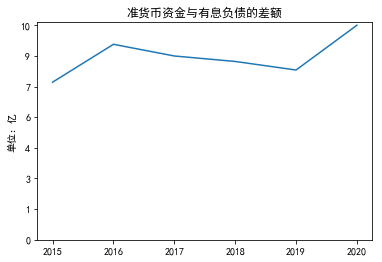

In [10]:
analysis.show_plot('t3', image_index=1)

### 应付预收减应收预付的差额

In [11]:
t4 = analysis.init_table('t4')
t4['应付与预收合计'] = t4.T[:4].sum()
t4['应收与预付合计'] = t4.T[5:10].sum()
t4['应付预收减应收预付的差额'] = t4['应付与预收合计'] - t4['应收与预付合计']

analysis.format_show_table('t4')

,2015,2016,2017,2018,2019,2020
其中：应付票据(元),"21,040,000","28,720,000","43,310,000","50,004,700","27,750,000","13,780,000"
应付账款(元),"57,143,800","61,261,600","71,819,700","110,799,100","212,610,900","150,309,000"
预收款项(元),"26,492,200","55,406,700","130,688,800","133,945,600","80,681,300",0
合同负债(元),0,0,0,0,0,"142,761,360"
应付与预收合计,"104,676,000","145,388,300","245,818,500","294,749,400","321,042,200","306,850,360"
其中：应收票据(元),"800,000","500,000","477,600","2,630,000",0,"4,405,700"
合同资产(元),0,0,0,0,0,"1,422,477"
应收款项融资,0,0,0,0,"5,815,853","3,600,000"
应收账款(元),"4,792,600","7,948,400","8,497,800","14,827,700","17,727,800","24,567,400"
预付款项(元),"3,903,900","4,259,700","10,817,800","30,558,900","13,716,800","14,705,400"


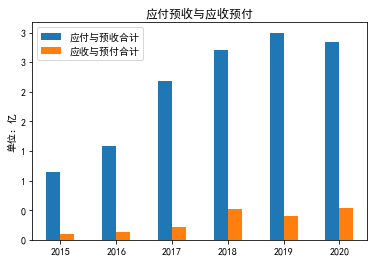

In [12]:
analysis.show_plot('t4')

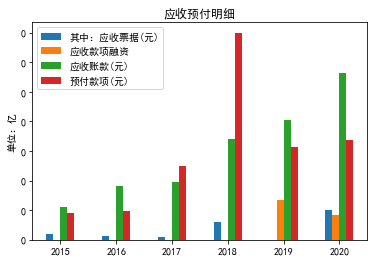

In [13]:
analysis.show_plot('t4', image_index=1)

### 应收账款+合同资产占总资产的比例

In [14]:
t5 = analysis.init_table('t5')
t5['应收账款+合同资产'] = t5.T[:2].sum()
t5['(应收账款+合同资产)占总资产的比率'] = t5['应收账款+合同资产'] / t5['资产合计(元)']

analysis.format_show_table('t5')

,2015,2016,2017,2018,2019,2020
合同资产(元),0,0,0,0,0,"1,422,477"
应收账款(元),"4,792,600","7,948,400","8,497,800","14,827,700","17,727,800","24,567,400"
应收账款+合同资产,"4,792,600","7,948,400","8,497,800","14,827,700","17,727,800","25,989,877"
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"
(应收账款+合同资产)占总资产的比率,0.40%,0.57%,0.51%,0.83%,0.89%,1.19%


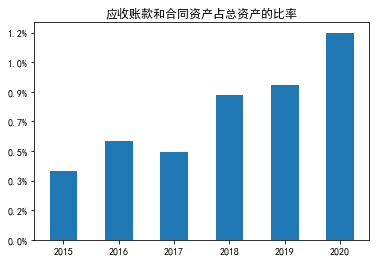

In [15]:
analysis.show_plot('t5')

### 固定资产占总资产的比重

In [16]:
t6 = analysis.init_table('t6')
t6['固定资产+在建工程'] = t6.T[:2].sum()
t6['固定型资产占总资产的比率'] = t6['固定资产+在建工程'] / t6['资产合计(元)']

analysis.format_show_table('t6')

,2015,2016,2017,2018,2019,2020
固定资产合计(元),"351,462,800","351,419,700","350,940,600","323,517,500","728,869,600","674,529,900"
在建工程合计(元),"2,623,600","1,751,500","14,166,700","238,247,000","80,713,600","120,273,100"
固定资产+在建工程,"354,086,400","353,171,200","365,107,300","561,764,500","809,583,200","794,803,000"
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"
固定型资产占总资产的比率,29.22%,25.27%,21.79%,31.55%,40.75%,36.48%


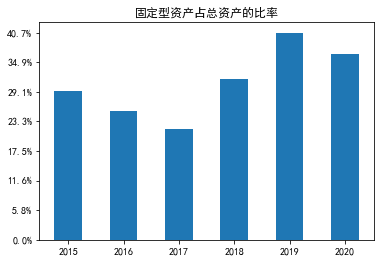

In [17]:
analysis.show_plot('t6')

### 投资类资产占比分析

In [18]:
t7 = analysis.init_table('t7')
t7['投资类资产合计'] = t7.T[:8].sum()
t7['投资类资产占总资产的比率'] = t7['投资类资产合计'] / t7['资产合计(元)']

analysis.format_show_table('t7')

,2015,2016,2017,2018,2019,2020
以公允价值计量且其变动计入当期损益的金融资产(元),0,0,0,0,0,0
债权投资(元),0,0,0,0,0,0
可供出售金融资产(元),0,0,"246,167,500","79,596,200",0,0
其他权益工具投资(元),0,0,0,0,"72,064,200","61,494,200"
持有至到期投资(元),0,0,0,0,0,0
其他非流动金融资产(元),0,0,0,0,0,0
长期股权投资(元),0,0,0,0,0,0
投资性房地产(元),0,0,0,0,0,0
投资类资产合计,0,0,"246,167,500","79,596,200","72,064,200","61,494,200"
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"


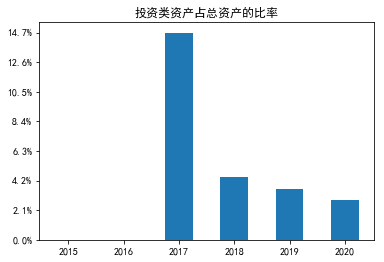

In [19]:
analysis.show_plot('t7')

In [20]:
t8 = analysis.init_table('t8')
t8['存货占总资产的比率'] = t8['存货(元)'] / t8[ '资产合计(元)']

analysis.format_show_table('t8')

,2015,2016,2017,2018,2019,2020
存货(元),"40,678,800","48,294,000","73,613,600","64,125,600","79,640,800","78,025,500"
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"
存货占总资产的比率,3.36%,3.46%,4.39%,3.60%,4.01%,3.58%


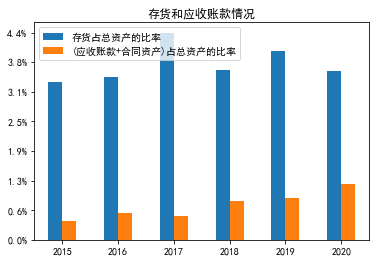

In [21]:
import pandas as pd
from analysis.utils import plot_show

tmp_df = pd.merge(
    t8['存货占总资产的比率'], 
    t5['(应收账款+合同资产)占总资产的比率'],
    right_index=True,
    left_index=True
)
plot_show(tmp_df, image_title=images['t8'][0], y_label='', y_format='', save_image=True)

### 商誉占比

In [22]:
t9 = analysis.init_table('t9')
t9['商誉占总资产的比率'] = t9['商誉(元)'] / t9[ '资产合计(元)']

analysis.format_show_table('t9')

,2015,2016,2017,2018,2019,2020
商誉(元),0,0,0,0,0,0
资产合计(元),"1,211,887,900","1,397,628,600","1,675,684,100","1,780,577,600","1,986,804,400","2,178,534,900"
商誉占总资产的比率,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


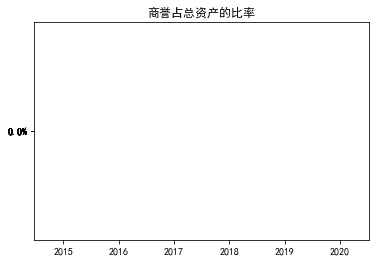

In [23]:
analysis.show_plot('t9')

### 营业收入分析

In [24]:
t10 = analysis.init_table('t10')
t10['营业收入增长率'] = t10['其中：营业收入(元)'].pct_change()

analysis.format_show_table('t10')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
营业收入增长率,nan%,28.54%,54.18%,36.49%,20.24%,5.13%


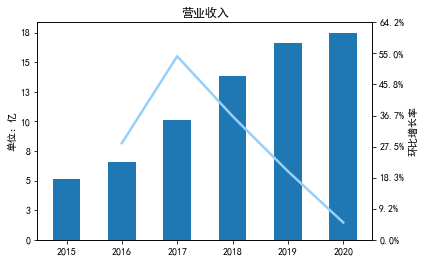

In [25]:
analysis.show_plot('t10')

In [26]:
t11 = analysis.init_table('t11')
t11['毛利率'] = (t11['其中：营业收入(元)']-t11['其中：营业成本(元)']) / t11['其中：营业收入(元)']
t11['毛利率波动率'] = t11['毛利率'].pct_change()

analysis.format_show_table('t11')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
其中：营业成本(元),"244,253,900","300,724,100","472,741,100","678,856,000","782,854,800","836,451,700"
毛利率,52.84%,54.82%,53.94%,51.54%,53.53%,52.76%
毛利率波动率,nan%,3.76%,-1.61%,-4.45%,3.85%,-1.42%


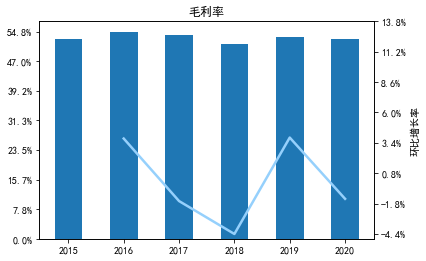

In [27]:
analysis.show_plot('t11')

### 期间费用率

In [28]:
t12 = analysis.init_table('t12')
t12.loc[t12['财务费用(元)']<0, '财务费用(元)'] = 0
t12['四费合计'] = t12.T[:4].sum()
t12['期间费用率'] = t12['四费合计'] / t12['其中：营业收入(元)']
t12['毛利率'] = t11['毛利率']
t12['期间费用率占毛利率的比率'] = t12['期间费用率'] / t12['毛利率']

analysis.format_show_table('t12')

,2015,2016,2017,2018,2019,2020
销售费用(元),"62,629,900","55,483,900","100,732,100","154,464,100","256,658,500","198,692,600"
管理费用(元),"62,775,000","79,550,900","82,973,600","80,703,600","65,784,400","61,820,000"
研发费用(元),0,0,"33,437,800","40,767,800","50,926,200","54,276,900"
财务费用(元),0,0,0,0,0,0
四费合计,"125,404,900","135,034,800","217,143,500","275,935,500","373,369,100","314,789,500"
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
期间费用率,24.22%,20.29%,21.16%,19.70%,22.17%,17.78%
毛利率,52.84%,54.82%,53.94%,51.54%,53.53%,52.76%
期间费用率占毛利率的比率,45.83%,37.00%,39.22%,38.22%,41.41%,33.69%


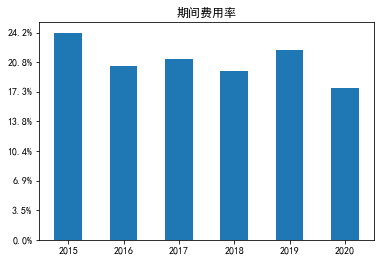

In [29]:
analysis.show_plot('t12')

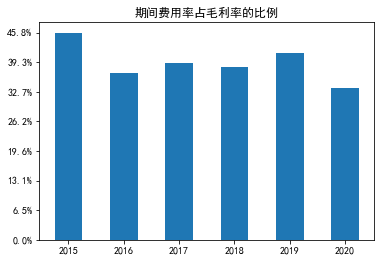

In [30]:
analysis.show_plot('t12', image_index=1)

### 销售费用率

In [31]:
t13 = analysis.init_table('t13')
t13['销售费用率'] = t13['销售费用(元)'] / t13['其中：营业收入(元)']

analysis.format_show_table('t13')

,2015,2016,2017,2018,2019,2020
销售费用(元),"62,629,900","55,483,900","100,732,100","154,464,100","256,658,500","198,692,600"
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
销售费用率,12.09%,8.33%,9.81%,11.03%,15.24%,11.22%


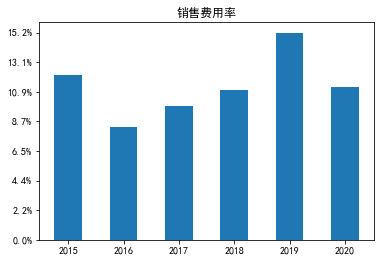

In [32]:
analysis.show_plot('t13')

### 主营利润

In [33]:
t14 = analysis.init_table('t14')
t14['四费合计'] = t12['四费合计']
t14['主营利润'] = t14['其中：营业收入(元)'] - t14.T[1:4].sum()
t14['主营利润率'] = t14['主营利润'] / t14['其中：营业收入(元)']
t14['主营利润占营业利润的比率'] = t14['主营利润'] / t14['三、营业利润(元)']

analysis.format_show_table('t14')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
其中：营业成本(元),"244,253,900","300,724,100","472,741,100","678,856,000","782,854,800","836,451,700"
营业税金及附加(元),"4,576,200","8,659,100","12,590,100","15,388,000","12,378,700","17,545,500"
四费合计,"125,404,900","135,034,800","217,143,500","275,935,500","373,369,100","314,789,500"
主营利润,"143,642,289","221,265,622","323,884,027","430,720,090","515,873,127","602,031,068"
主营利润率,27.74%,33.24%,31.56%,30.75%,30.63%,34.00%
三、营业利润(元),"172,276,538","240,639,873","358,999,257","445,604,542","534,758,624","635,352,096"
主营利润占营业利润的比率,83.38%,91.95%,90.22%,96.66%,96.47%,94.76%


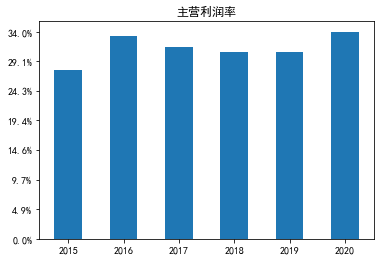

In [34]:
analysis.show_plot('t14')

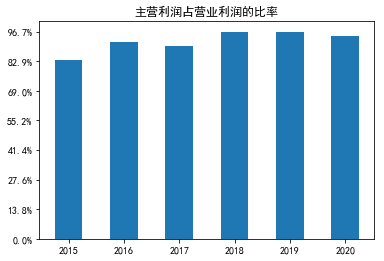

In [35]:
analysis.show_plot('t14', image_index=1)

### 看净利润，了解公司的经营成果及含金量

In [36]:
t15 = analysis.init_table('t15')
t15['净利润现金比率'] = t15['经营活动产生的现金流量净额(元)'] / t15['五、净利润(元)']

analysis.format_show_table('t15')

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
五、净利润(元),"155,641,200","202,656,100","305,192,100","377,525,100","460,012,900","543,562,800"
净利润现金比率,99.89%,131.51%,147.01%,117.05%,118.12%,116.61%


In [37]:
print(f"连续 5 年的平均净利润现金含量：{t15['净利润现金比率'].mean():.2%}")

连续 5 年的平均净利润现金含量：121.70%


### 归母净利润

In [38]:
t16 = analysis.init_table('t16')
t16['ROE 净资产收益率'] = t16['归属于母公司所有者的净利润(元)'] / t16['归属于母公司所有者权益合计(元)']
t16['归属于母公司所有者的净利润增长率'] = t16['归属于母公司所有者的净利润(元)'].pct_change()

analysis.format_show_table('t16')

,2015,2016,2017,2018,2019,2020
归属于母公司所有者的净利润(元),"155,641,200","202,656,100","305,192,100","377,525,100","460,012,900","543,562,800"
归属于母公司所有者权益合计(元),"1,043,472,100","1,151,053,400","1,308,412,500","1,365,076,200","1,519,248,100","1,703,713,900"
ROE 净资产收益率,14.92%,17.61%,23.33%,27.66%,30.28%,31.90%
归属于母公司所有者的净利润增长率,nan%,30.21%,50.60%,23.70%,21.85%,18.16%


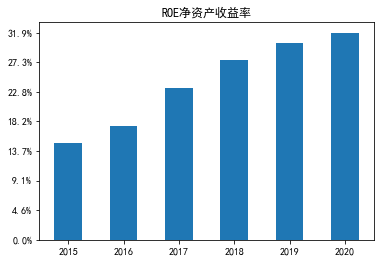

In [39]:
analysis.show_plot('t16')

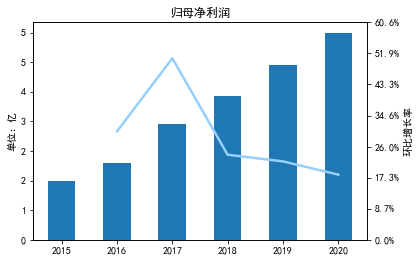

In [40]:
analysis.show_plot('t16', image_index=1)

### 构建三产支付的现金

In [41]:
t17 = analysis.init_table('t17')

t17['购建支付的现金与经营活动产生的现金流量净额的比率'] = \
t17['购建固定资产、无形资产和其他长期资产支付的现金(元)'] / t17['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t17')

,2015,2016,2017,2018,2019,2020
购建固定资产、无形资产和其他长期资产支付的现金(元),"39,159,400","46,062,000","102,501,400","291,719,600","279,600,900","70,295,000"
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
购建支付的现金与经营活动产生的现金流量净额的比率,25.19%,17.28%,22.85%,66.02%,51.46%,11.09%


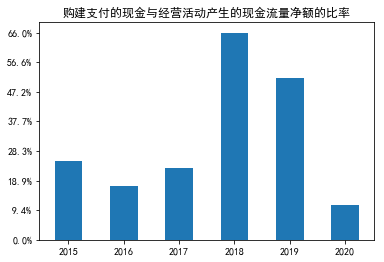

In [42]:
analysis.show_plot('t17')

### 分红

In [43]:
t18 = analysis.init_table('t18')

t18['分配股利、利润或偿付利息支付的现金占经营活动产生的现金流量净额的比率'] = \
t18['分配股利、利润或偿付利息支付的现金(元)'] / t18['经营活动产生的现金流量净额(元)']

analysis.format_show_table('t18')

,2015,2016,2017,2018,2019,2020
分配股利、利润或偿付利息支付的现金(元),"100,000,000","100,000,000","198,400,000","298,973,000","303,667,700","350,160,000"
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
分配股利、利润或偿付利息支付的现金占经营活动产生的现金流量净额的比率,64.32%,37.52%,44.22%,67.66%,55.88%,55.24%


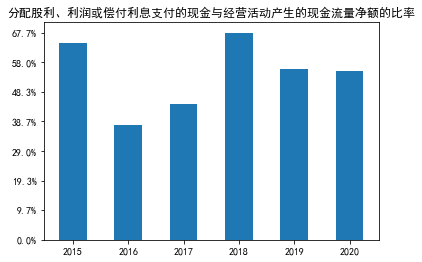

In [44]:
analysis.show_plot('t18')

### 公司类型

In [45]:
t19 = analysis.init_table('t19')
t19_tmp = t19.copy()

t19_tmp['经营活动产生的现金流量净额(元)'][t19['经营活动产生的现金流量净额(元)']>0] = "正"
t19_tmp['经营活动产生的现金流量净额(元)'][t19['经营活动产生的现金流量净额(元)']<0] = "负"

t19_tmp['投资活动产生的现金流量净额(元)'][t19['投资活动产生的现金流量净额(元)']>0] = "正"
t19_tmp['投资活动产生的现金流量净额(元)'][t19['投资活动产生的现金流量净额(元)']<0] = "负"

t19_tmp['筹资活动产生的现金流量净额(元)'][t19['筹资活动产生的现金流量净额(元)']>0] = "正"
t19_tmp['筹资活动产生的现金流量净额(元)'][t19['筹资活动产生的现金流量净额(元)']<0] = "负"

t19_tmp['三大活动现金流量净额类型'] = \
t19_tmp['经营活动产生的现金流量净额(元)'] + t19_tmp['投资活动产生的现金流量净额(元)'] + t19_tmp['筹资活动产生的现金流量净额(元)']

t19['三大活动现金流量净额类型'] = t19_tmp['三大活动现金流量净额类型']
analysis.format_show_table('t19', ignore=['三大活动现金流量净额类型'])

,2015,2016,2017,2018,2019,2020
经营活动产生的现金流量净额(元),"155,476,300","266,508,400","448,664,200","441,885,700","543,387,300","633,842,700"
投资活动产生的现金流量净额(元),"-46,594,012","-207,333,726","240,241,214","-171,272,049","-274,100,160","-570,044,987"
筹资活动产生的现金流量净额(元),"-111,000,000","-53,649,946","-196,749,992","-299,122,986","-303,667,671","-350,159,993"
三大活动现金流量净额类型,正负负,正负负,正正负,正负负,正负负,正负负


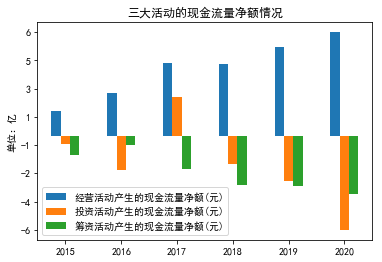

In [46]:
analysis.show_plot('t19')

### 输出分析报告

In [47]:
ReportDocument(analysis).save()